In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split,ParameterGrid, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
#################################################################
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
#######################################################################
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#########################################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data=pd.read_csv('D:/Python\CellulaFinal/first inten project.csv')
task2_data=pd.read_csv('D:/Python\CellulaFinal/first inten project.csv')
task3_date=pd.read_csv('D:/Python\CellulaFinal/first inten project.csv')

In [4]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
task3_date.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [6]:
task3_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
task3_date['date of reservation'] = pd.to_datetime(task3_date['date of reservation'], errors='coerce')

# Drop rows with NaT in the 'date' column
df_cleaned3 = task3_date.dropna(subset=['date of reservation'])

# Extract the year from the cleaned date column
df_cleaned3['date of reservation'] = df_cleaned3['date of reservation'].dt.year
df_cleaned3=df_cleaned3.drop(columns=['Booking_ID'])

C:\Users\Salma\AppData\Local\Temp\ipykernel_724\115613968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned3['date of reservation'] = df_cleaned3['date of reservation'].dt.year


In [8]:
df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  object 
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  object 
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  object 
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  date o

In [9]:
label_encoders = {}
df_cleaned4=df_cleaned3.copy()
for column in df_cleaned4.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned4[column] = le.fit_transform(df_cleaned4[column])
    label_encoders[column] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("\nMapping of Labels to Original Categories:")
    print(mapping)
print(df_cleaned3.select_dtypes(include=['object']).columns)
print(df_cleaned4.select_dtypes(include=['object']).columns)


Mapping of Labels to Original Categories:
{'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}

Mapping of Labels to Original Categories:
{'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}

Mapping of Labels to Original Categories:
{'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}

Mapping of Labels to Original Categories:
{'Canceled': 0, 'Not_Canceled': 1}
Index(['type of meal', 'room type', 'market segment type', 'booking status'], dtype='object')
Index([], dtype='object')


In [10]:
df_cleaned4.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,2015,1
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,2018,1
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2018,0
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,2017,0
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,2018,0


In [11]:
def remove_outlierss(task2_data2, column):
    Q1 = task2_data2[column].quantile(0.25)
    Q3 = task2_data2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return task2_data2[(task2_data2[column] >= lower_bound) & (task2_data2[column] <= upper_bound)]
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return outliers_count

def count_all_outliers(data):
    outliers_counts = {}
    numerical_columns = data.select_dtypes(include='number').columns
    for col in numerical_columns:
        outliers_counts[col] = count_outliers(data, col)
    return outliers_counts

# Example usage
# Assuming task2_data2 is your DataFrame containing numerical columns
outliers_counts = count_all_outliers(df_cleaned4)
print("Number of outliers for each numerical column:")
print(outliers_counts)
# Remove outliers for all numerical columns
df_cleaned5 = df_cleaned4.copy()
for column in ['lead time','average price ','special requests']:
    df_cleaned5 = remove_outlierss(df_cleaned5, column)

print("\nDataFrame after removing outliers for all numerical columns:")
print( df_cleaned5.shape)

Number of outliers for each numerical column:
{'number of adults': 10155, 'number of children': 2698, 'number of weekend nights': 21, 'number of week nights': 323, 'type of meal': 8439, 'car parking space': 1121, 'room type': 8135, 'lead time': 1332, 'market segment type': 515, 'repeated': 926, 'P-C': 337, 'P-not-C': 809, 'average price ': 1692, 'special requests': 762, 'date of reservation': 6518, 'booking status': 0}

DataFrame after removing outliers for all numerical columns:
(32636, 16)


In [12]:
df_cleaned5.rename(columns={'average price ': 'average price'}, inplace=True)

In [13]:
df_cleaned5.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

In [14]:
df_cleaned5.isna().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [15]:
X5=df_cleaned5.iloc[:,:-1]
y5=df_cleaned5.iloc[:,-1]
X5.shape

(32636, 15)

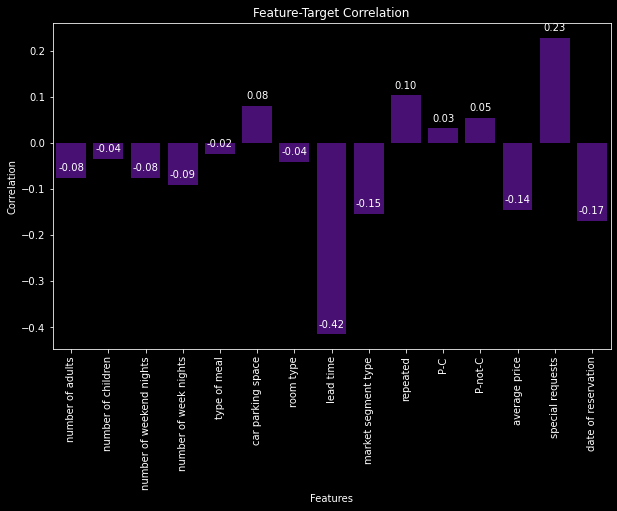

[-0.07614869 -0.03530862 -0.07505639 -0.09053719 -0.02438079  0.08063837
 -0.04190769 -0.41501432 -0.15459953  0.1031963   0.03155653  0.05469367
 -0.1447253   0.22781131 -0.16902093]


In [16]:

def plot_feature_target_correlation(X, y):
    correlations = X.corrwith(y)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=correlations.index, y=correlations.values, color='#4b0082')
    plt.title('Feature-Target Correlation')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()
    return correlations.values

# Example usage
# Assuming X and y are already defined
correlations_values=plot_feature_target_correlation(X5, y5)
print(correlations_values)

In [17]:
from feau
def select_features(X, y, threshold=0.08):
    pearson_corr = {}
    spearman_corr = {}

    # Calculate Pearson and Spearman correlations for each feature
    for col in X.columns:
        pearson_corr[col] = pearsonr(X[col], y)[0]
        spearman_corr[col] = spearmanr(X[col], y)[0]

    # Select features based on the specified threshold for both methods
    pearson_selected = [col for col, corr in pearson_corr.items() if abs(corr) > threshold]
    spearman_selected = [col for col, corr in spearman_corr.items() if abs(corr) > threshold]

    return pearson_selected, spearman_selected

def calculate_correlations(X, y, selected_features):
    pearson_corr = {}
    spearman_corr = {}

    # Calculate Pearson correlations for selected features
    for col in selected_features[0]:
        pearson_corr[col] = pearsonr(X[col], y)[0]

    # Calculate Spearman correlations for selected features
    for col in selected_features[1]:
        spearman_corr[col] = spearmanr(X[col], y)[0]

    # Create DataFrames for correlations
    pearson_df = pd.DataFrame({'Pearson': pearson_corr})
    spearman_df = pd.DataFrame({'Spearman': spearman_corr})

    return pearson_df, spearman_df

def plot_correlation_matrix(corr_matrix, method='Pearson'):
    plt.figure(figsize=(10, 8))
    if method == 'Pearson':
        plt.title('Pearson Correlation Matrix')
    elif method == 'Spearman':
        plt.title('Spearman Correlation Matrix')
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.show()

def plot_feature_target_correlationn(X, y, pearson_correlations, spearman_correlations):
    plt.figure(figsize=(14, 6))

    # Plot Pearson correlations
    plt.subplot(1, 2, 1)
    ax1 = sns.barplot(x=pearson_correlations.index, y=pearson_correlations.values.flatten(), color='#7b68ee')
    plt.title('Pearson Feature-Target Correlation')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=90)
    for p in ax1.patches:
        ax1.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Plot Spearman correlations
    plt.subplot(1, 2, 2)
    ax2 = sns.barplot(x=spearman_correlations.index, y=spearman_correlations.values.flatten(), color='#da70d6')
    plt.title('Spearman Feature-Target Correlation')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(rotation=90)
    for p in ax2.patches:
        ax2.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming X and y are already defined
threshold = 0.07
pearson_selected5, spearman_selected5 = select_features(X5, y5, threshold=threshold)

# Create DataFrame with selected features
X_pearson_selected5 = X5[pearson_selected5]
X_spearman_selected5 = X5[spearman_selected5]

# Calculate correlations for selected features using respective selected features
pearson_correlations5, spearman_correlations5 = calculate_correlations(X5, y5, [pearson_selected5, spearman_selected5])

print("Selected Pearson's Features:\n", pearson_selected5)
print("Selected Spearman's Features:\n", spearman_selected5)

print("\nPearson's Correlations:\n", pearson_correlations5)
print("\nSpearman's Correlations:\n", spearman_correlations5)

# Plot correlation matrices
plot_correlation_matrix(X_pearson_selected5.corr(method='pearson'), method='Pearson')
plot_correlation_matrix(X_spearman_selected5.corr(method='spearman'), method='Spearman')

# Plot feature-target correlations
plot_feature_target_correlationn(X_pearson_selected5, y5 ,pearson_correlations5, spearman_correlations5)



SyntaxError: invalid syntax (890493522.py, line 1)

In [ ]:
def Scaler(X):
    column_names = X.columns
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=column_names)
    return X_scaled_df

In [ ]:
def MinMaxScalerTransform(X, feature_range=(0, 3), copy=True):
    scaler = MinMaxScaler(feature_range=feature_range, copy=copy)
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    return X_scaled_df

In [ ]:
def Normalize(X,y):
  X1=Scaler(X)
  #X2=PolynomialFeaturesScaler(X)
  X3=MinMaxScalerTransform(X)
  #print(X1[:5,:])
  #print(X1.loc[:5,:])
  X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.33, random_state=42,shuffle=True)
  return X_train, X_test, y_train, y_test



In [ ]:
#X_pearson_selected
#X_spearman_selected
X_train, X_test, y_train, y_test=Normalize(X5,y5)
X_train

In [ ]:
conda list | findstr scikit-learn

In [ ]:
print(RandomForestClassifier)

In [ ]:
X_train, X_test, y_train, y_test = Normalize(X5, y5)
from sklearn.ensemble import VotingClassifier,StackingClassifier
best_gb_model={'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 3000, 'random_state': 44}
best_params_rf={'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 44}
best_params_xg={'n_estimators': 476, 'learning_rate': 0.03025721669562415, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8659335070916522, 'gamma': 0.06347746578675272, 'reg_alpha': 0.07283915233350813, 'reg_lambda': 0.07042163436121887}
best_params_knn={'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 1}
best_params_dt={'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 3}
best_params_rf2={'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 44}
rf_model = RandomForestClassifier(**best_params_rf)
xgb_model = xgb.XGBClassifier( **best_params_xg)
gb_model=GradientBoostingClassifier(**best_gb_model)
knn_model=KNeighborsClassifier(**best_params_knn)
dt_model=DecisionTreeClassifier(**best_params_dt)
rf_model2=RandomForestClassifier(**best_params_rf2)
# Create an ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model),('gb',gb_model),('knn',knn_model),('dt',dt_model),('rf2', rf_model2)], voting='soft',weights=[2, 3, 1, 1, 1, 2])

# Create the RFE object with the ensemble model
rfe = RFE(estimator=rf_model, n_features_to_select=12, step=1)

# Create a pipeline with RFE and the ensemble model
pipeline = Pipeline(steps=[('rfe', rfe), ('ensemble', ensemble_model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model test accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation
cv_scores = cross_val_score(pipeline, MinMaxScalerTransform(X5), y5, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


In [ ]:
import joblib

# Assuming rf_model is your trained model with feature selection
joblib.dump(pipeline , 'pipelinee_model.pkl')

In [ ]:
cv_scores

In [19]:
X5.shape

(32636, 15)

In [ ]:
'''X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.33, random_state=42)

# Best parameters for each model
best_params_rf = {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 44}
best_params_xg = {'n_estimators': 476, 'learning_rate': 0.03025721669562415, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8659335070916522, 'gamma': 0.06347746578675272, 'reg_alpha': 0.07283915233350813, 'reg_lambda': 0.07042163436121887}
best_params_gb = {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 3000, 'random_state': 44}
best_params_knn = {'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 1}
best_params_dt = {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 3}

# Individual models
rf_model = RandomForestClassifier(**best_params_rf)
xgb_model = GradientBoostingClassifier(**best_params_gb)
knn_model = KNeighborsClassifier(**best_params_knn)
dt_model = DecisionTreeClassifier(**best_params_dt)


# Apply RFE to select top 12 features
rfe = RFE(estimator=rf_model, n_features_to_select=12, step=1)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]
selected_features
'''

In [ ]:
'''X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize scalers
scaler = MinMaxScaler()

# Scale the training and testing sets
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
joblib.dump(scaler, 'scaler.pkl')
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(**best_params_rf)), 
    ('xgb', xgb.XGBClassifier(**best_params_xg)), 
    ('gb', GradientBoostingClassifier(**best_gb_model)), 
    ('knn', KNeighborsClassifier(**best_params_knn)), 
    ('dt', DecisionTreeClassifier(**best_params_dt)), 
    ('rf2', RandomForestClassifier(**best_params_rf2))
], voting='soft', weights=[2, 3, 1, 1, 1, 2])
ensemble_model.fit(X_train_scaled_df, y_train)

# Predict on the test data
y_pred = ensemble_model.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model test accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()'''

In [ ]:
cv_scores = cross_val_score(ensemble_model, X5N, y5, cv=7)
print(f"Cross-validated accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


In [ ]:
cv_scores

In [ ]:
X5N=pd.DataFrame(scaler.transform(X5[selected_features]), columns=selected_features)
y5.shape

In [ ]:
X5N.head()

In [ ]:
X_train_selected.head()

In [28]:
X_test_selected.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,average price,special requests,date of reservation
5680,2,0,0,4,0,0,0,28,3,85.6,0,2017
30713,2,0,0,2,0,0,0,29,2,85.0,0,2018
29861,2,0,0,1,0,0,0,36,4,96.3,1,2017
23178,1,0,1,0,0,0,0,19,4,99.0,2,2018
24164,2,0,1,0,0,0,0,9,4,101.0,0,2018


In [ ]:
X_test_scaled_df.head()

In [29]:
y_test.head()

5680     1
30713    1
29861    1
23178    1
24164    0
Name: booking status, dtype: int32

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'average price',
       'special requests', 'date of reservation'],
      dtype='object')
Ensemble model test accuracy: 0.8870009285051068
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3467
           1       0.90      0.93      0.92      7303

    accuracy                           0.89     10770
   macro avg       0.88      0.86      0.87     10770
weighted avg       0.89      0.89      0.89     10770

Confusion Matrix:
[[2732  735]
 [ 482 6821]]


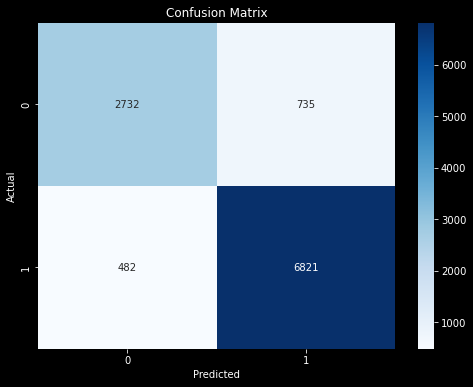

In [25]:
import joblib
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.33, random_state=42)

# Best parameters for each model
best_gb_model={'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 3000, 'random_state': 44}
best_params_rf={'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 44}
best_params_xg={'n_estimators': 476, 'learning_rate': 0.03025721669562415, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8659335070916522, 'gamma': 0.06347746578675272, 'reg_alpha': 0.07283915233350813, 'reg_lambda': 0.07042163436121887}
best_params_knn={'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 1}
best_params_dt={'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 3}
best_params_rf2={'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 44}
rf_model = RandomForestClassifier(**best_params_rf)
xgb_model = xgb.XGBClassifier( **best_params_xg)
gb_model=GradientBoostingClassifier(**best_gb_model)
knn_model=KNeighborsClassifier(**best_params_knn)
dt_model=DecisionTreeClassifier(**best_params_dt)
rf_model2=RandomForestClassifier(**best_params_rf2)
# Apply RFE to select top 12 features
rfe = RFE(estimator=rf_model, n_features_to_select=12, step=1)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]
print(selected_features)
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize scalers
scaler = MinMaxScaler()

# Scale the training and testing sets
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
joblib.dump(scaler, 'scaler.pkl')
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(**best_params_rf)), 
    ('xgb', xgb.XGBClassifier(**best_params_xg)), 
    ('gb', GradientBoostingClassifier(**best_gb_model)), 
    ('knn', KNeighborsClassifier(**best_params_knn)), 
    ('dt', DecisionTreeClassifier(**best_params_dt)), 
    ('rf2', RandomForestClassifier(**best_params_rf2))
], voting='soft', weights=[2, 3, 1, 1, 1, 2])
ensemble_model.fit(X_train_scaled_df, y_train)

# Predict on the test data
y_pred = ensemble_model.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model test accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
joblib.dump(ensemble_model , 'ensemblee_model.pkl')

In [27]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']